<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# Simple Linear Regression with Sacramento Real Estate Data

_Authors: Matt Brems, Sam Stack, Justin Pounders_

---

In this lab you will hone your exploratory data analysis (EDA) skills and practice constructing simple linear regressions using a data set on Sacramento real estate sales.  The data set contains information on qualities of the property, location of the property, and time of sale.

### 1. Read in the Sacramento housing data set.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
sac_csv = './datasets/sacramento_real_estate_transactions.csv'

In [3]:
df = pd.read_csv(sac_csv)

In [4]:
df.head()

,street,city,zip,state,beds,baths,sq__ft,type,sale_date,price,latitude,longitude
0,3526 HIGH ST,SACRAMENTO,95838,CA,2,1,836,Residential,Wed May 21 00:00:00 EDT 2008,59222,38.631913,-121.434879
1,51 OMAHA CT,SACRAMENTO,95823,CA,3,1,1167,Residential,Wed May 21 00:00:00 EDT 2008,68212,38.478902,-121.431028
2,2796 BRANCH ST,SACRAMENTO,95815,CA,2,1,796,Residential,Wed May 21 00:00:00 EDT 2008,68880,38.618305,-121.443839
3,2805 JANETTE WAY,SACRAMENTO,95815,CA,2,1,852,Residential,Wed May 21 00:00:00 EDT 2008,69307,38.616835,-121.439146
4,6001 MCMAHON DR,SACRAMENTO,95824,CA,2,1,797,Residential,Wed May 21 00:00:00 EDT 2008,81900,38.519470,-121.435768


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 985 entries, 0 to 984
Data columns (total 12 columns):
street       985 non-null object
city         985 non-null object
zip          985 non-null int64
state        985 non-null object
beds         985 non-null int64
baths        985 non-null int64
sq__ft       985 non-null int64
type         985 non-null object
sale_date    985 non-null object
price        985 non-null int64
latitude     985 non-null float64
longitude    985 non-null float64
dtypes: float64(2), int64(5), object(5)
memory usage: 92.4+ KB


In [6]:
df.describe()

,zip,beds,baths,sq__ft,price,latitude,longitude
count,985.000000,985.000000,985.000000,985.000000,985.000000,985.000000,985.000000
mean,95750.697462,2.911675,1.776650,1312.918782,233715.951269,38.445121,-121.193371
std,85.176072,1.307932,0.895371,856.123224,139088.818896,5.103637,5.100670
min,95603.000000,0.000000,0.000000,-984.000000,-210944.000000,-121.503471,-121.551704
25%,95660.000000,2.000000,1.000000,950.000000,145000.000000,38.482704,-121.446119
50%,95762.000000,3.000000,2.000000,1304.000000,213750.000000,38.625932,-121.375799
75%,95828.000000,4.000000,2.000000,1718.000000,300000.000000,38.695589,-121.294893
max,95864.000000,8.000000,5.000000,5822.000000,884790.000000,39.020808,38.668433


In [7]:
mask = df['sq__ft'] < 0

In [8]:
df[mask]

,street,city,zip,state,beds,baths,sq__ft,type,sale_date,price,latitude,longitude
703,1900 DANBROOK DR,SACRAMENTO,95835,AC,1,1,-984,Condo,Fri May 16 00:00:00 EDT 2008,-210944,-121.503471,38.668433


In [9]:
df[df['sq__ft'] < 0]

,street,city,zip,state,beds,baths,sq__ft,type,sale_date,price,latitude,longitude
703,1900 DANBROOK DR,SACRAMENTO,95835,AC,1,1,-984,Condo,Fri May 16 00:00:00 EDT 2008,-210944,-121.503471,38.668433


In [10]:
df.describe()

,zip,beds,baths,sq__ft,price,latitude,longitude
count,985.000000,985.000000,985.000000,985.000000,985.000000,985.000000,985.000000
mean,95750.697462,2.911675,1.776650,1312.918782,233715.951269,38.445121,-121.193371
std,85.176072,1.307932,0.895371,856.123224,139088.818896,5.103637,5.100670
min,95603.000000,0.000000,0.000000,-984.000000,-210944.000000,-121.503471,-121.551704
25%,95660.000000,2.000000,1.000000,950.000000,145000.000000,38.482704,-121.446119
50%,95762.000000,3.000000,2.000000,1304.000000,213750.000000,38.625932,-121.375799
75%,95828.000000,4.000000,2.000000,1718.000000,300000.000000,38.695589,-121.294893
max,95864.000000,8.000000,5.000000,5822.000000,884790.000000,39.020808,38.668433


### 2. Conduct exploratory data analysis on this data set. 

**Report any notable findings here and any steps you take to clean/process data.**

> **Note:** These EDA checks should be done on every data set you handle. If you find yourself checking repeatedly for missing/corrupted data, it might be beneficial to have a function that you can reuse every time you're given new data.

In [11]:
# A:

_**Fun Fact:** Zip codes often have leading zeros — e.g., 02215 = Boston, MA — which will often get knocked off automatically by many software programs like Python or Excel. You can imagine that this could create some issues. _

### 3. Our goal will be to predict price. List variables that you think qualify as predictors of price in an SLR model. 

**For each of the variables you believe to be a valid potential predictor in an SLR model, generate a plot showing the relationship between the independent and dependent variables.**

In [12]:
df.columns

Index(['street', 'city', 'zip', 'state', 'beds', 'baths', 'sq__ft', 'type',
       'sale_date', 'price', 'latitude', 'longitude'],
      dtype='object')

In [13]:
df.head()

,street,city,zip,state,beds,baths,sq__ft,type,sale_date,price,latitude,longitude
0,3526 HIGH ST,SACRAMENTO,95838,CA,2,1,836,Residential,Wed May 21 00:00:00 EDT 2008,59222,38.631913,-121.434879
1,51 OMAHA CT,SACRAMENTO,95823,CA,3,1,1167,Residential,Wed May 21 00:00:00 EDT 2008,68212,38.478902,-121.431028
2,2796 BRANCH ST,SACRAMENTO,95815,CA,2,1,796,Residential,Wed May 21 00:00:00 EDT 2008,68880,38.618305,-121.443839
3,2805 JANETTE WAY,SACRAMENTO,95815,CA,2,1,852,Residential,Wed May 21 00:00:00 EDT 2008,69307,38.616835,-121.439146
4,6001 MCMAHON DR,SACRAMENTO,95824,CA,2,1,797,Residential,Wed May 21 00:00:00 EDT 2008,81900,38.519470,-121.435768


In [14]:
df['city'].value_counts(ascending = True)

MATHER               1
DIAMOND SPRINGS      1
MEADOW VISTA         1
GARDEN VALLEY        1
COOL                 1
WALNUT GROVE         1
SHINGLE SPRINGS      1
GREENWOOD            1
FORESTHILL           1
PENRYN               1
SLOUGHHOUSE          1
LOOMIS               2
EL DORADO            2
POLLOCK PINES        3
RANCHO MURIETA       3
GRANITE BAY          3
WEST SACRAMENTO      3
ELVERTA              4
GOLD RIVER           4
WILTON               5
AUBURN               5
FAIR OAKS            9
CAMERON PARK         9
PLACERVILLE         10
ORANGEVALE          11
RIO LINDA           13
FOLSOM              17
ROCKLIN             17
CARMICHAEL          20
GALT                21
NORTH HIGHLANDS     21
EL DORADO HILLS     23
RANCHO CORDOVA      28
ANTELOPE            33
CITRUS HEIGHTS      35
ROSEVILLE           48
LINCOLN             72
ELK GROVE          114
SACRAMENTO         439
Name: city, dtype: int64

In [15]:
X = ['beds', 'baths', 'sq__ft', 'city']

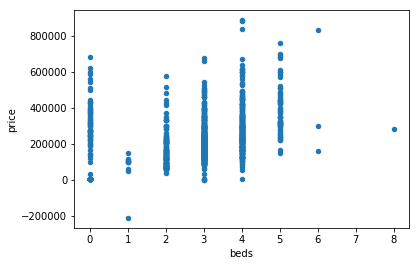

In [16]:
df.plot.scatter(x = 'beds', y = 'price')

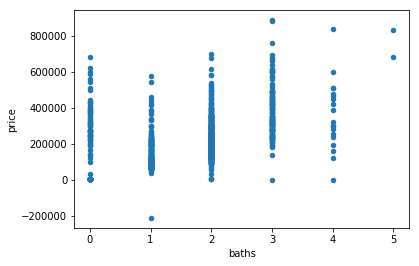

In [17]:
df.plot.scatter(x = 'baths', y = 'price')

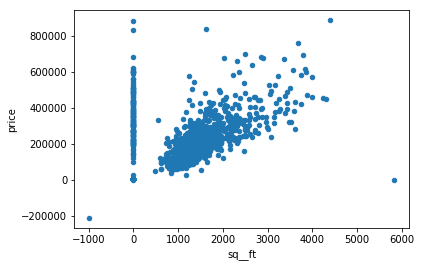

In [18]:
df.plot.scatter(x = 'sq__ft', y = 'price')

In [19]:
df.drop(df[df['sq__ft'] <= 0].index, inplace = True)

df.drop(df[df['beds'] == 0].index, inplace = True)

df.drop(df[df['baths'] == 0].index, inplace = True)

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 813 entries, 0 to 984
Data columns (total 12 columns):
street       813 non-null object
city         813 non-null object
zip          813 non-null int64
state        813 non-null object
beds         813 non-null int64
baths        813 non-null int64
sq__ft       813 non-null int64
type         813 non-null object
sale_date    813 non-null object
price        813 non-null int64
latitude     813 non-null float64
longitude    813 non-null float64
dtypes: float64(2), int64(5), object(5)
memory usage: 82.6+ KB


When you've finished cleaning or have made a good deal of progress cleaning, it's always a good idea to save your work.
```python
shd.to_csv('./datasets/sacramento_real_estate_transactions_Clean.csv')
```

In [21]:
df.reset_index(inplace = True)

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 813 entries, 0 to 812
Data columns (total 13 columns):
index        813 non-null int64
street       813 non-null object
city         813 non-null object
zip          813 non-null int64
state        813 non-null object
beds         813 non-null int64
baths        813 non-null int64
sq__ft       813 non-null int64
type         813 non-null object
sale_date    813 non-null object
price        813 non-null int64
latitude     813 non-null float64
longitude    813 non-null float64
dtypes: float64(2), int64(6), object(5)
memory usage: 82.6+ KB


In [23]:
df.head()

,index,street,city,zip,state,beds,baths,sq__ft,type,sale_date,price,latitude,longitude
0,0,3526 HIGH ST,SACRAMENTO,95838,CA,2,1,836,Residential,Wed May 21 00:00:00 EDT 2008,59222,38.631913,-121.434879
1,1,51 OMAHA CT,SACRAMENTO,95823,CA,3,1,1167,Residential,Wed May 21 00:00:00 EDT 2008,68212,38.478902,-121.431028
2,2,2796 BRANCH ST,SACRAMENTO,95815,CA,2,1,796,Residential,Wed May 21 00:00:00 EDT 2008,68880,38.618305,-121.443839
3,3,2805 JANETTE WAY,SACRAMENTO,95815,CA,2,1,852,Residential,Wed May 21 00:00:00 EDT 2008,69307,38.616835,-121.439146
4,4,6001 MCMAHON DR,SACRAMENTO,95824,CA,2,1,797,Residential,Wed May 21 00:00:00 EDT 2008,81900,38.519470,-121.435768


In [24]:
from sklearn.metrics import r2_score

In [25]:
import seaborn as sns

/Users/richardmason/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


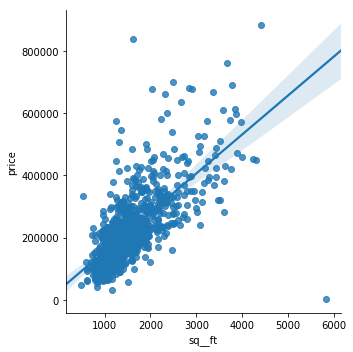

In [26]:
sns.lmplot('sq__ft', 'price', data = df)

In [27]:
import scipy.stats as stats

/Users/richardmason/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
/Users/richardmason/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:1847: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))


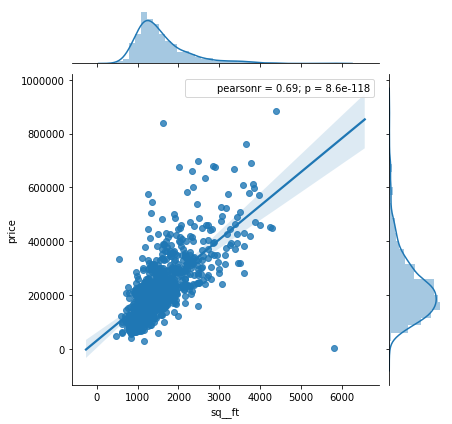

In [28]:
sns.jointplot(x = 'sq__ft', y = 'price', data = df, kind = 'reg').annotate(stats.pearsonr)

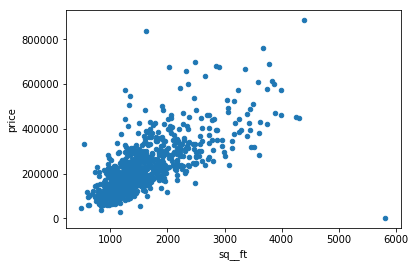

In [29]:
df.plot.scatter(x = 'sq__ft', y = 'price')

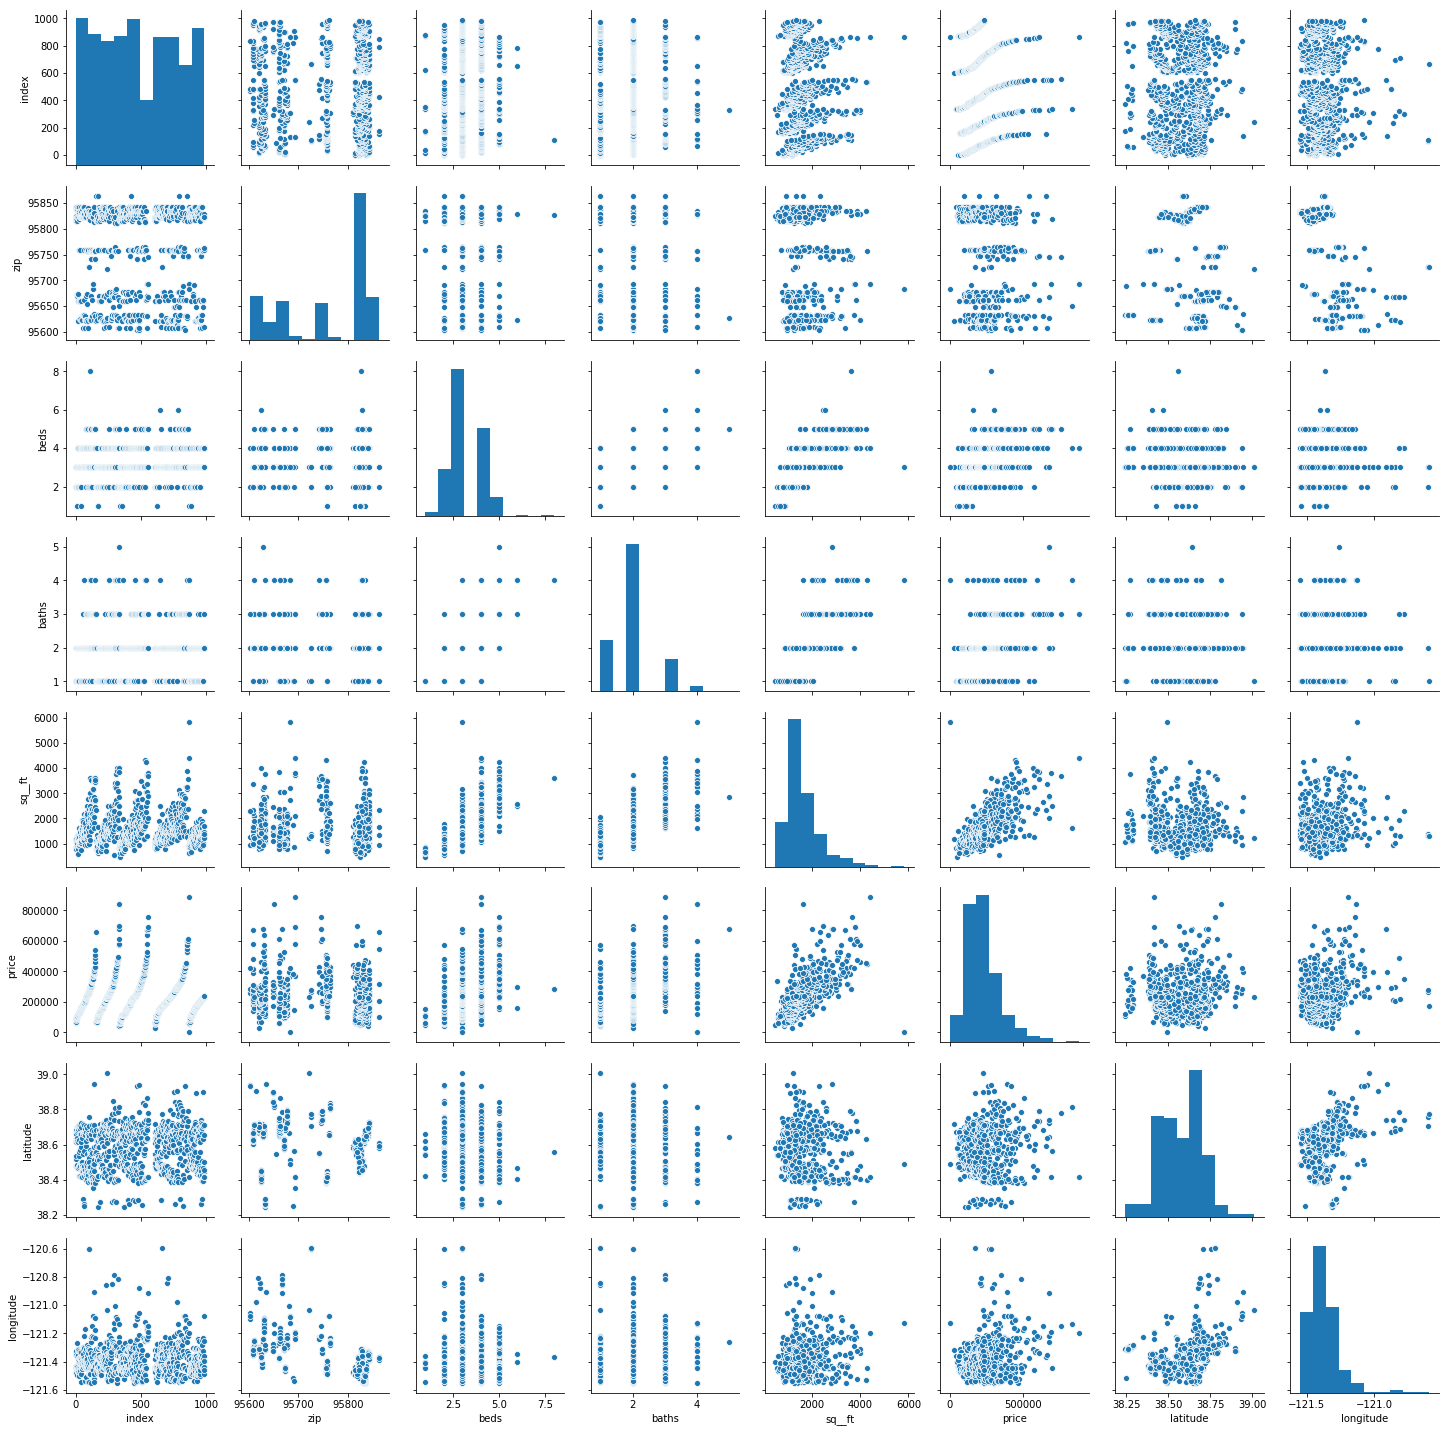

In [30]:
sns.pairplot(df)

### 5. Build a function that will take in two lists, `Y` and `X`, and return the intercept and slope coefficients that minimize SSE. 

`Y` is the target variable and `X` is the predictor variable.

- **Test your function on price and the variable you determined was the best predictor in Problem 4.**
- **Report the slope and intercept.**

In [31]:
# A:

### 6. Interpret the intercept. Interpret the slope.

In [32]:
# A:

### 7. Give an example of how this model could be used for prediction and how it could be used for inference. 

**Be sure to make it clear which example is associated with prediction and which is associated with inference.**

In [33]:
# A:

### 8: [Bonus] Using the model you came up with in Problem 5, calculate and plot the residuals.

In [34]:
# A:

---

> The material following this point can be completed after the second lesson on Monday.

---

## Dummy Variables

---

It is important to be cautious with categorical variables, which represent distict groups or categories, when building a regression. If put in a regression "as-is," categorical variables represented as integers will be treated like *continuous* variables.

That is to say, instead of group "3" having a different effect on the estimation than group "1" it will estimate literally 3 times more than group 1. 

For example, if occupation category "1" represents "analyst" and occupation category "3" represents "barista", and our target variable is salary, if we leave this as a column of integers then barista will always have `beta*3` the effect of analyst.

This will almost certainly force the beta coefficient to be something strange and incorrect. Instead, we can re-represent the categories as multiple "dummy coded" columns.

### 9. Use the `pd.get_dummies` function to convert the `type` column into dummy-coded variables.

Print out the header of the dummy-coded variable output.

In [35]:
df.drop(columns = 'index', inplace=True)

In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 813 entries, 0 to 812
Data columns (total 12 columns):
street       813 non-null object
city         813 non-null object
zip          813 non-null int64
state        813 non-null object
beds         813 non-null int64
baths        813 non-null int64
sq__ft       813 non-null int64
type         813 non-null object
sale_date    813 non-null object
price        813 non-null int64
latitude     813 non-null float64
longitude    813 non-null float64
dtypes: float64(2), int64(5), object(5)
memory usage: 76.3+ KB


In [37]:
df['city'].value_counts()

SACRAMENTO         423
ELK GROVE          107
CITRUS HEIGHTS      35
ANTELOPE            33
ROSEVILLE           28
NORTH HIGHLANDS     21
RANCHO CORDOVA      21
GALT                20
CARMICHAEL          20
FOLSOM              15
RIO LINDA           12
ORANGEVALE          11
FAIR OAKS            9
ROCKLIN              8
LINCOLN              6
PLACERVILLE          5
WILTON               4
ELVERTA              4
GRANITE BAY          3
POLLOCK PINES        3
GOLD RIVER           3
EL DORADO HILLS      3
AUBURN               3
EL DORADO            2
RANCHO MURIETA       2
LOOMIS               2
MEADOW VISTA         1
MATHER               1
DIAMOND SPRINGS      1
WEST SACRAMENTO      1
WALNUT GROVE         1
CAMERON PARK         1
GREENWOOD            1
COOL                 1
PENRYN               1
SLOUGHHOUSE          1
Name: city, dtype: int64

In [51]:
df = pd.concat([df, pd.get_dummies(df['city'])], axis = 1)

In [52]:
df.head()

,street,city,zip,state,beds,baths,sq__ft,type,sale_date,price,...,RANCHO CORDOVA,RANCHO MURIETA,RIO LINDA,ROCKLIN,ROSEVILLE,SACRAMENTO,SLOUGHHOUSE,WALNUT GROVE,WEST SACRAMENTO,WILTON
0,3526 HIGH ST,SACRAMENTO,95838,CA,2,1,836,Residential,Wed May 21 00:00:00 EDT 2008,59222,...,0,0,0,0,0,1,0,0,0,0
1,51 OMAHA CT,SACRAMENTO,95823,CA,3,1,1167,Residential,Wed May 21 00:00:00 EDT 2008,68212,...,0,0,0,0,0,1,0,0,0,0
2,2796 BRANCH ST,SACRAMENTO,95815,CA,2,1,796,Residential,Wed May 21 00:00:00 EDT 2008,68880,...,0,0,0,0,0,1,0,0,0,0
3,2805 JANETTE WAY,SACRAMENTO,95815,CA,2,1,852,Residential,Wed May 21 00:00:00 EDT 2008,69307,...,0,0,0,0,0,1,0,0,0,0
4,6001 MCMAHON DR,SACRAMENTO,95824,CA,2,1,797,Residential,Wed May 21 00:00:00 EDT 2008,81900,...,0,0,0,0,0,1,0,0,0,0


In [58]:
df['city'].value_counts()

SACRAMENTO         423
ELK GROVE          107
CITRUS HEIGHTS      35
ANTELOPE            33
ROSEVILLE           28
NORTH HIGHLANDS     21
RANCHO CORDOVA      21
GALT                20
CARMICHAEL          20
FOLSOM              15
RIO LINDA           12
ORANGEVALE          11
FAIR OAKS            9
ROCKLIN              8
LINCOLN              6
PLACERVILLE          5
WILTON               4
ELVERTA              4
GRANITE BAY          3
POLLOCK PINES        3
GOLD RIVER           3
EL DORADO HILLS      3
AUBURN               3
EL DORADO            2
RANCHO MURIETA       2
LOOMIS               2
MEADOW VISTA         1
MATHER               1
DIAMOND SPRINGS      1
WEST SACRAMENTO      1
WALNUT GROVE         1
CAMERON PARK         1
GREENWOOD            1
COOL                 1
PENRYN               1
SLOUGHHOUSE          1
Name: city, dtype: int64

In [62]:
X = df[['sq__ft', 'baths', 'beds']]
y = df['price']

In [63]:
X.head()

,sq__ft,baths,beds
0,836,1,2
1,1167,1,3
2,796,1,2
3,852,1,2
4,797,1,2


In [68]:
y.head()

0    59222
1    68212
2    68880
3    69307
4    81900
Name: price, dtype: int64

In [64]:
from sklearn.linear_model import LinearRegression

In [65]:
lr = LinearRegression()

In [66]:
lr.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [69]:
predictions = lr.predict(X)

In [70]:
lr.score(X, y)

0.4848293402207817

In [76]:
r2_score(y, predictions)

0.4848293402207817

In [71]:
from sklearn.metrics import mean_squared_error

In [73]:
MSE = mean_squared_error(y, predictions)

In [74]:
RMSE = np.sqrt(MSE)

In [75]:
RMSE

86004.0114733921

In [77]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 813 entries, 0 to 812
Data columns (total 48 columns):
street             813 non-null object
city               813 non-null object
zip                813 non-null int64
state              813 non-null object
beds               813 non-null int64
baths              813 non-null int64
sq__ft             813 non-null int64
type               813 non-null object
sale_date          813 non-null object
price              813 non-null int64
latitude           813 non-null float64
longitude          813 non-null float64
ANTELOPE           813 non-null uint8
AUBURN             813 non-null uint8
CAMERON PARK       813 non-null uint8
CARMICHAEL         813 non-null uint8
CITRUS HEIGHTS     813 non-null uint8
COOL               813 non-null uint8
DIAMOND SPRINGS    813 non-null uint8
EL DORADO          813 non-null uint8
EL DORADO HILLS    813 non-null uint8
ELK GROVE          813 non-null uint8
ELVERTA            813 non-null uint8
FAIR OAKS   

In [ ]:
X = 

---

### A Word of Caution When Creating Dummies

Let's touch on precautions we should take when dummy coding.

**If you convert a qualitative variable to dummy variables, you want to turn a variable with N categories into N-1 variables.**

> **Scenario 1:** Suppose we're working with the variable "sex" or "gender" with values "M" and "F". 

You should include in your model only one variable for "sex = F" which takes on 1 if sex is female and 0 if sex is not female! Rather than saying "a one unit change in X," the coefficient associated with "sex = F" is interpreted as the average change in Y when sex = F relative to when sex = M.

| Female | Male | 
|-------|------|
| 0 | 1 | 
| 1 | 0 |
| 0 | 1 |
| 1 | 0 |
| 1 | 0 |
_As we can see a 1 in the female column indicates a 0 in the male column. And so, we have two columns stating the same information in different ways._

> Scenario 2: Suppose we're modeling revenue at a bar for each of the days of the week. We have a column with strings identifying which day of the week this observation occured in.

We might include six of the days as their own variables: "Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday". **But not all 7 days.**  

|Monday | Tuesday | Wednesday | Thursday | Friday | Saturday | 
|-------|---------|-----------|----------|--------|----------|
| 1     | 0       |0          |      0   |0       | 0        | 
| 0     | 1       |0          |      0   |0       | 0        | 
| 0     | 0       |1          |      0   |0       | 0        | 
| 0     | 0       |0          |      1   |0       | 0        | 
| 0     | 0       |0          |      0   |1       | 0        | 
| 0     | 0       |0          |      0   |0       | 1        | 
| 0     | 0       |0          |      0   |0       | 0        | 

_As humans we can infer from the last row that if its is not Monday, Tusday, Wednesday, Thursday, Friday or Saturday than it must be Sunday. Models work the same way._

The coefficient for Monday is then interpreted as the average change in revenue when "day = Monday" relative to "day = Sunday." The coefficient for Tuesday is interpreted in the average change in revenue when "day = Tuesday" relative to "day = Sunday" and so on.

The category you leave out, which the other columns are *relative to* is often referred to as the **reference category**.

### 10. Remove "Unkown" from four dummy coded variable dataframe and append the rest to the original data.

In [42]:
# A:

### 11. Build what you think may be the best MLR model predicting `price`. 

The independent variables are your choice, but *include at least three variables.* At least one of which should be a dummy-coded variable (either one we created before or a new one).

To construct your model don't forget to load in the statsmodels api:

```python
from sklearn.linear_model import LinearRegression

model = LinearRegression()
```

In [43]:
# A:

### 12. Plot the true price vs the predicted price to evaluate your MLR visually.

> **Tip:** with seaborn's `sns.lmplot` you can set `x`, `y`, and even a `hue` (which will plot regression lines by category in different colors) to easily plot a regression line.

In [44]:
# A:

### 13. List the five assumptions for an MLR model. 

Indicate which ones are the same as the assumptions for an SLR model. 

(Answer here as markdown)

### 14. Pick at least two assumptions and articulate whether or not you believe them to be met  for your model and why.

In [45]:
# A:

### 15. [Bonus] Generate a table showing the point estimates, standard errors, t-scores, p-values, and 95% confidence intervals for the model you built. 

**Write a few sentences interpreting some of the output.**

> **Hint:** scikit-learn does not have this functionality built in, but statsmodels does in the `summary` method.  To fit the statsmodels model use something like the following.  There is one big caveat here, however!  `statsmodels.OLS` does _not_ add an intercept to your model, so you will need to do this explicitly by adding a column filled with the number 1 to your X matrix

```python
import statsmodels.api as sm

# The Default here is Linear Regression (ordinary least squares regression OLS)
model = sm.OLS(y,X).fit()
```

In [46]:
# A:

---

> The material following this point can be completed after the first lesson on Tuesday.

---

### 16. Regression Metrics

Implement a function called `r2_adj()` that will calculate $R^2_{adj}$ for a model. 

In [47]:
# A:

### 17. Metrics, metrics, everywhere...

Write a function to calculate and print or return six regression metrics.  Use other functions liberally, including those found in `sklearn.metrics`.

In [48]:
# A:

### 18. Model Iteration

Evaluate your current home price prediction model by calculating all six regression metrics.  Now adjust your model (e.g. add or take away features) and see how to metrics change.

In [49]:
# A:

### 19. Bias vs. Variance

At this point, do you think your model is high bias, high variance or in the sweet spot?  If you are doing this after Wednesday, can you provide evidence to support your belief?

In [50]:
# A: